## Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [123]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####  Load the dataset and explore the variables

In [129]:
#Importing the data 
data=pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:>

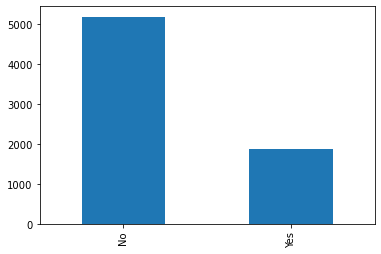

In [154]:
label_data = pd.value_counts(data['Churn'])
label_data.plot(kind = 'bar')

In [126]:
#data is imbalance.

In [131]:
# build X and y
X= data.drop(['customerID', 'gender','Partner', 'Dependents','PhoneService', 
                          'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','TotalCharges'],axis=1)

# data_columns = data[['tenure','SeniorCitizen', 'MonthlyCharges', 'Churn']]

In [132]:
#Split into numerical and categorical.
X_num = X.select_dtypes(include= np.number)
X_cat = X.select_dtypes(include = object)

In [134]:
X_cat.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [135]:
#dealing with the categorical variables. Transforming to numerical to include them in our model.
X_cat = pd.get_dummies(X_cat, columns=['Churn'], drop_first=True)
X_cat.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


#### Extract the independent variables and scale them.

In [136]:
X_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [137]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
X_scaled = pd.DataFrame(transformer.transform(X_num),columns=X_num.columns)
X_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365


In [138]:
#Joining numerical and categorical dataframes.
data_final = pd.concat([X_num,X_cat], axis=1)
data_final.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn_Yes
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [139]:
# build X and y
y = data_final['Churn_Yes']
X= data_final.drop(['Churn_Yes'], axis=1)

In [140]:
X.head()
X.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [141]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X_num.columns)
X_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365


#### Build the logistic regression model.

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [143]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7808063600227144

#### Evaluate the model.

In [144]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

#### Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [146]:
from imblearn.over_sampling import SMOTE

In [147]:
# by deafult, takes a 5-neightbour KNN to build a new point
sm = SMOTE(random_state=100,sampling_strategy='minority',k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [148]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [150]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]], dtype=int64)

**Is it there any improvement?**

**After balancing the data with Smote my model is better.**

For this problem is important to predict clients that are going to churn to take actions to avoid this. In case we predict a client as NO churn but they are a YES_churn our problem is important because we are not going to take the actions needed for retaining them. 
On the other hand, if our model predicts that clients are going to churn and the reality is they will not, we just going to take action to retain them, which is much less harmful than the case above. 
So in this case is better to have False positives than False Negatives. 

 **After balancing our data with SMOTE our False Negative are reduced so is better although our False positive are increased.**